In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data_path = './netflix_titles.csv'

# 캐글 데이터셋을 이용한 간단 실습

## 1. Datasets에 접속하여 netflix-shows 검색 

In [2]:
import pandas as pd
data = pd.read_csv(data_path)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape

(8807, 12)

## 2. type 항목은 데이터가 TV Show인지, Movie인지를 나타낸다. 이를 수치화 하는 코드를 작성하여라.

In [4]:
import numpy as np

cnt = 0
data_np = np.zeros([data.shape[0],12])
type_num = np.zeros([data_np.shape[0]])

# data_np

for t in data['type']:
    if t == 'TV Show':
        type_num[cnt] = 1
    cnt += 1
type_num

array([0., 1., 1., ..., 0., 0., 0.])

## 3. country는 제작국가를 의미한다. 이를 수치화하는 코드를 작성하여라.

In [5]:
data['country'].isnull().sum()

831

In [6]:
# 결측치 채우기
data['country'] = data['country'].fillna('Unknown')
data['country'].isnull().sum()

0

In [7]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
data['country'].value_counts()

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [9]:
# 여러 나라 같이 있는 부분 나누기
country_info = []
country_data = [i.replace(', ',',').replace(' ,',',') for i in data['country']]
country_data[:50]

['United States',
 'South Africa',
 'Unknown',
 'Unknown',
 'India',
 'Unknown',
 'Unknown',
 'United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia',
 'United Kingdom',
 'United States',
 'Unknown',
 'Unknown',
 'Germany,Czech Republic',
 'Unknown',
 'Unknown',
 'United States',
 'Unknown',
 'Mexico',
 'Unknown',
 'Unknown',
 'Unknown',
 'Turkey',
 'Unknown',
 'Unknown',
 'India',
 'Australia',
 'Unknown',
 'United States',
 'United States',
 'United States,India,France',
 'Unknown',
 'Unknown',
 'United Kingdom',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Finland',
 'China,Canada,United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Unknown',
 'South Africa,United States,Japan',
 'Unknown',
 'United States',
 'Nigeria']

In [10]:
# 나라 중복 없이 저장
for c in country_data:
    c_split = c.split(',')
#     print(c_split)
    for cc in c_split:
        if cc not in country_info:
            country_info.append(cc) # 없는 나라만 추가
            
print(country_info)
print(len(country_info))

['United States', 'South Africa', 'Unknown', 'India', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland', 'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria', 'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal', 'Serbia', 'Malta', 'Namibia', 'Angola', 'Peru', 'Mozambique', 'Belarus', 'Zimbabwe', 'Puerto Rico', 'Pakistan', 'Cyprus', 'Gu

In [11]:
country_num = [i for i in range(len(country_info))]
print(country_num)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]


In [12]:
country_dict = {}

for k, v in zip(country_info, country_num):
    country_dict[k] = v # {'나라이름':숫자}
    
print(country_dict)

{'United States': 0, 'South Africa': 1, 'Unknown': 2, 'India': 3, 'Ghana': 4, 'Burkina Faso': 5, 'United Kingdom': 6, 'Germany': 7, 'Ethiopia': 8, 'Czech Republic': 9, 'Mexico': 10, 'Turkey': 11, 'Australia': 12, 'France': 13, 'Finland': 14, 'China': 15, 'Canada': 16, 'Japan': 17, 'Nigeria': 18, 'Spain': 19, 'Belgium': 20, 'South Korea': 21, 'Singapore': 22, 'Italy': 23, 'Romania': 24, 'Argentina': 25, 'Venezuela': 26, 'Hong Kong': 27, 'Russia': 28, '': 29, 'Ireland': 30, 'Nepal': 31, 'New Zealand': 32, 'Brazil': 33, 'Greece': 34, 'Jordan': 35, 'Colombia': 36, 'Switzerland': 37, 'Israel': 38, 'Taiwan': 39, 'Bulgaria': 40, 'Algeria': 41, 'Poland': 42, 'Saudi Arabia': 43, 'Thailand': 44, 'Indonesia': 45, 'Egypt': 46, 'Denmark': 47, 'Kuwait': 48, 'Netherlands': 49, 'Malaysia': 50, 'Vietnam': 51, 'Hungary': 52, 'Sweden': 53, 'Lebanon': 54, 'Syria': 55, 'Philippines': 56, 'Iceland': 57, 'United Arab Emirates': 58, 'Norway': 59, 'Qatar': 60, 'Mauritius': 61, 'Austria': 62, 'Cameroon': 63, 'P

In [13]:
data['country'] 

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [14]:
for dc in data['country']:
    dc = dc.split(',')
#     print(dc)
    
    for d in dc:
        d = country_dict[d.lstrip()] # lstrip():왼쪽 공백 제거
print(country_dict)
print(len(country_dict))

{'United States': 0, 'South Africa': 1, 'Unknown': 2, 'India': 3, 'Ghana': 4, 'Burkina Faso': 5, 'United Kingdom': 6, 'Germany': 7, 'Ethiopia': 8, 'Czech Republic': 9, 'Mexico': 10, 'Turkey': 11, 'Australia': 12, 'France': 13, 'Finland': 14, 'China': 15, 'Canada': 16, 'Japan': 17, 'Nigeria': 18, 'Spain': 19, 'Belgium': 20, 'South Korea': 21, 'Singapore': 22, 'Italy': 23, 'Romania': 24, 'Argentina': 25, 'Venezuela': 26, 'Hong Kong': 27, 'Russia': 28, '': 29, 'Ireland': 30, 'Nepal': 31, 'New Zealand': 32, 'Brazil': 33, 'Greece': 34, 'Jordan': 35, 'Colombia': 36, 'Switzerland': 37, 'Israel': 38, 'Taiwan': 39, 'Bulgaria': 40, 'Algeria': 41, 'Poland': 42, 'Saudi Arabia': 43, 'Thailand': 44, 'Indonesia': 45, 'Egypt': 46, 'Denmark': 47, 'Kuwait': 48, 'Netherlands': 49, 'Malaysia': 50, 'Vietnam': 51, 'Hungary': 52, 'Sweden': 53, 'Lebanon': 54, 'Syria': 55, 'Philippines': 56, 'Iceland': 57, 'United Arab Emirates': 58, 'Norway': 59, 'Qatar': 60, 'Mauritius': 61, 'Austria': 62, 'Cameroon': 63, 'P

## 4. release_year 은 개봉된 연도를 의미하며, 숫자로 저장되어 있다. 이를 정규화하는 코드를 작성하라.

In [15]:
data['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [16]:
data_np[:,7] = data['release_year']/2021
data_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5. 개봉연도별 영화/TV Show의 개수를 히스토그램으로 표시하여라.

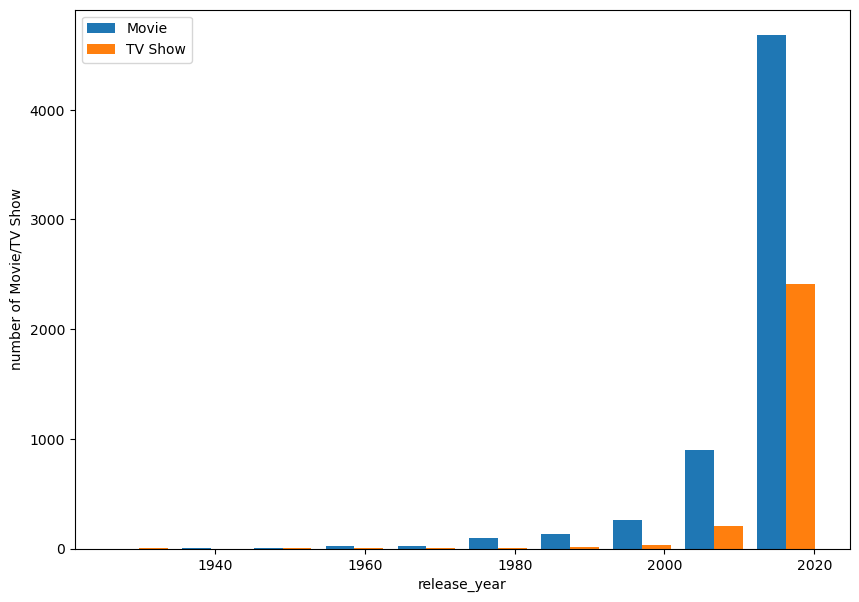

In [17]:
import matplotlib.pyplot as plt

movie = data[data.type == 'Movie'] # 영화별로
tv = data[data.type == 'TV Show'] # tv별로

plt.figure(figsize=(10,7))
plt.hist([movie['release_year'], tv['release_year']])
plt.legend(['Movie','TV Show'])
plt.xlabel('release_year')
plt.ylabel('number of Movie/TV Show')
plt.show()